# Проект: Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

# Описание данных

Признаки:

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:

- Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-объектов" data-toc-modified-id="Взвешивание-объектов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание объектов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Выбор-порога" data-toc-modified-id="Выбор-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [90]:
#подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [91]:
#загружаем датасет и смотрим на данные
df = pd.read_csv('/datasets/Churn.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [92]:
df.shape

(10000, 14)

In [93]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [95]:
df.duplicated().sum()

0

In [96]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

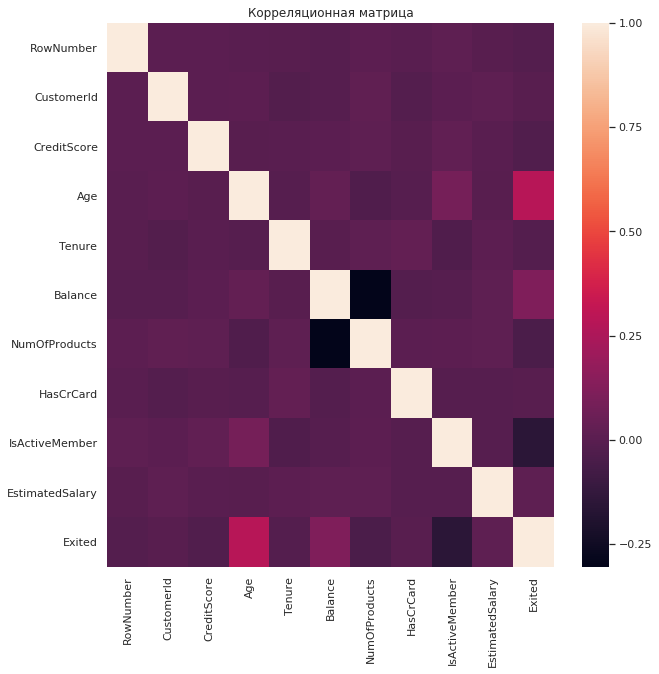

In [97]:
def heatmap_builder():
    plt.figure(figsize=(10,10))
    plt.title('Корреляционная матрица')
    sns.heatmap(df.corr());
    plt.show()
    
heatmap_builder()

Промежуточный выводы:
    
- Дубликатов нет. 
- 909 пропусков по признаку Tenure (кол-во лет как клиента банка). Принимаем гипотезу, что отсутствующие данные по кол-ву лет как клиента банка означают 0 лет. Заменим пропуски на ноль.
- Тип признака Tenure можно заменить на int, но в этом нет смысла, так как далее применяется стандартизация
- Взаимозависимых количественных признаков нет
- Излишние признаки датасета: RowNumber, CustomerId, Surname
- Имеются категориальные признаки, которые можно обработать с помощью прямого кодирования
- Имеются численные признаки, которые имеют разный маштаб и которые можно нормализовать

In [98]:
def hist_builder(data_column, label, bins):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(20,10))
    axes[0].set_title("Плотность распределения для параметра: " + label, fontsize=20)
    axes[0].set_ylabel("Плотность параметра: " + label, fontsize=18)
    axes[0].set_xlabel("Параметр: " + label, fontsize=18)
    sns.distplot(data_column, axlabel="Параметр: " + label, bins=bins, ax=axes[0])
    
    axes[1].set_title("Boxplot для параметра: " + label, fontsize=18)
    axes[1].set_xlabel("Параметр: " + label, fontsize=18)
    sns.boxplot(data=data_column, orient='h', ax=axes[1])
    plt.show()
    
def anomaly_detection(data_column, label):
    anomaly_threshold = data_column.quantile(0.75) + (data_column.quantile(0.75) - data_column.quantile(0.25)) * 1.5
    anomaly_percent = round(len(data_column[data_column > anomaly_threshold]) / len(data_column) * 100, 2)
    print("Доля выбросов параметра " + label + " равно: " + str(anomaly_percent) + "%")
    
def check_param(data_column, label, bins):
    hist_builder(data_column, label, bins)
    anomaly_detection(data_column, label)

Анализ параметра 'CreditScore':


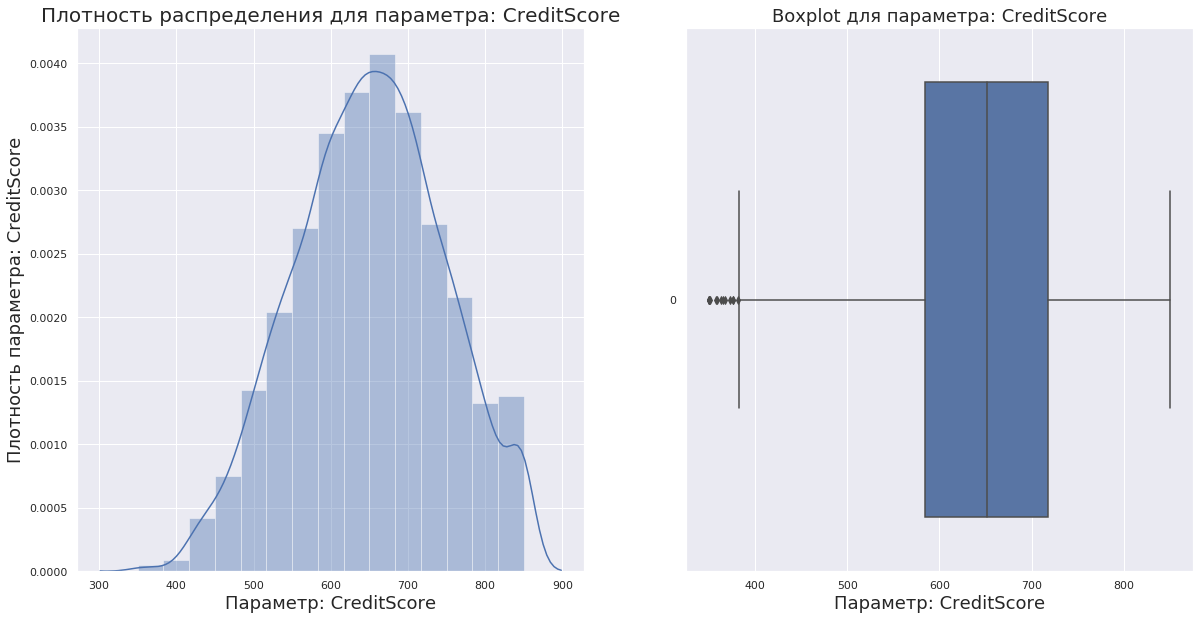

Доля выбросов параметра CreditScore равно: 0.0%
Анализ параметра 'Age':


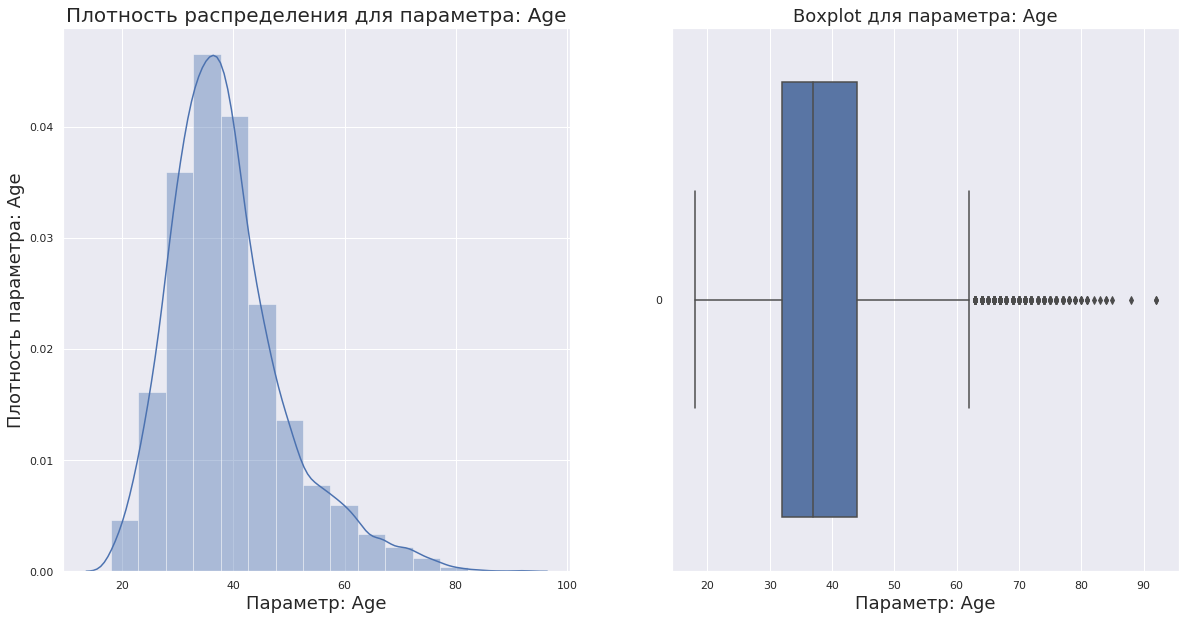

Доля выбросов параметра Age равно: 3.59%
Анализ параметра 'Balance':


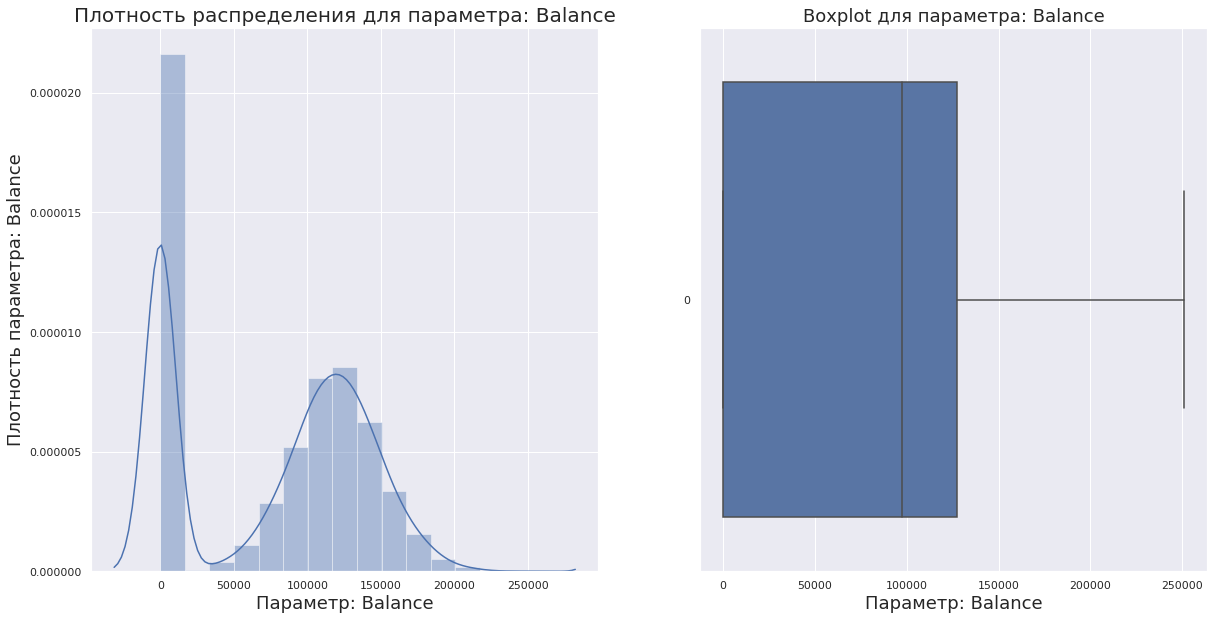

Доля выбросов параметра Balance равно: 0.0%
Анализ параметра 'EstimatedSalary':


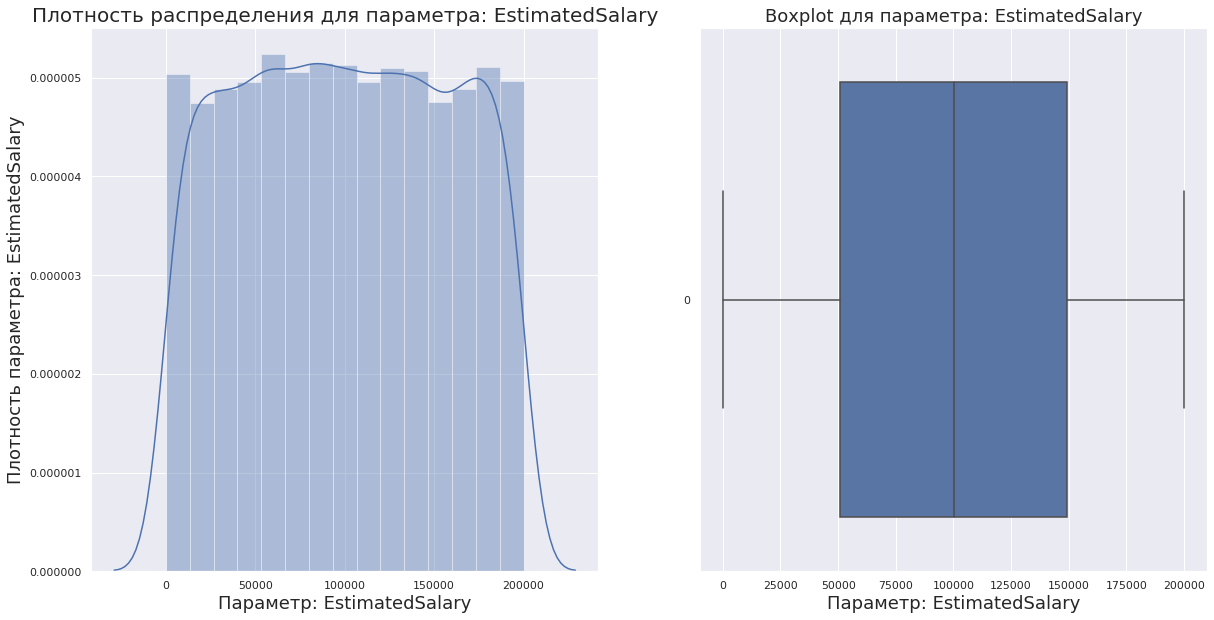

Доля выбросов параметра EstimatedSalary равно: 0.0%


In [99]:
for column in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    print("Анализ параметра '" + column + "':")
    check_param(df[column], column, 15)

Значимых выбросов в данных не наблюдаем. Заметен нулевой пик по признаку Balance.

In [100]:
def pie_chart_builder(name):
    plt.figure(figsize=(12,12))
    df[name].value_counts().plot(kind='pie', autopct='%.0f%%')
    plt.title('Круговая диаграмма для параметра: ' + name)
    plt.show()

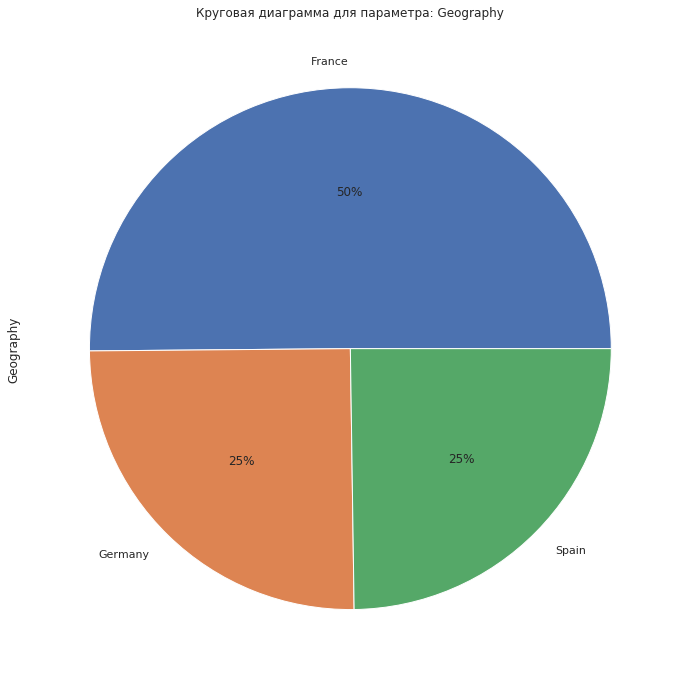

In [101]:
pie_chart_builder('Geography')

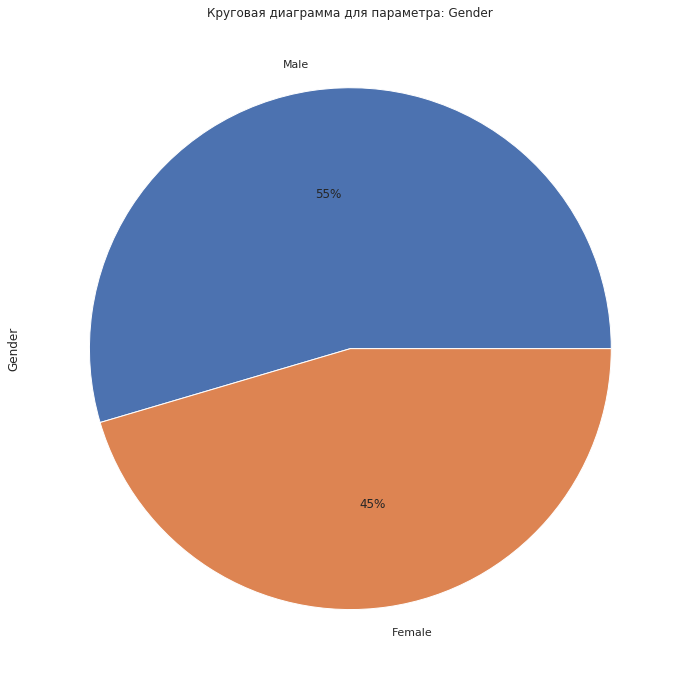

In [102]:
pie_chart_builder('Gender')

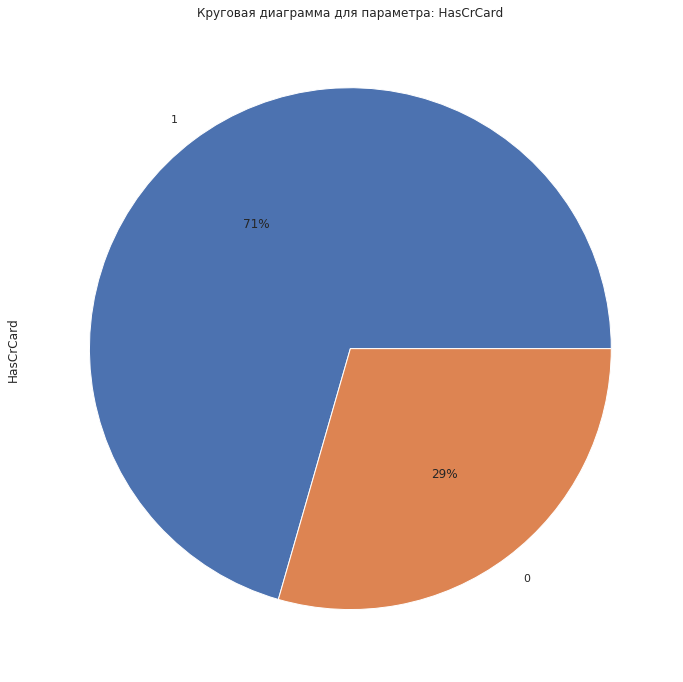

In [103]:
pie_chart_builder('HasCrCard')

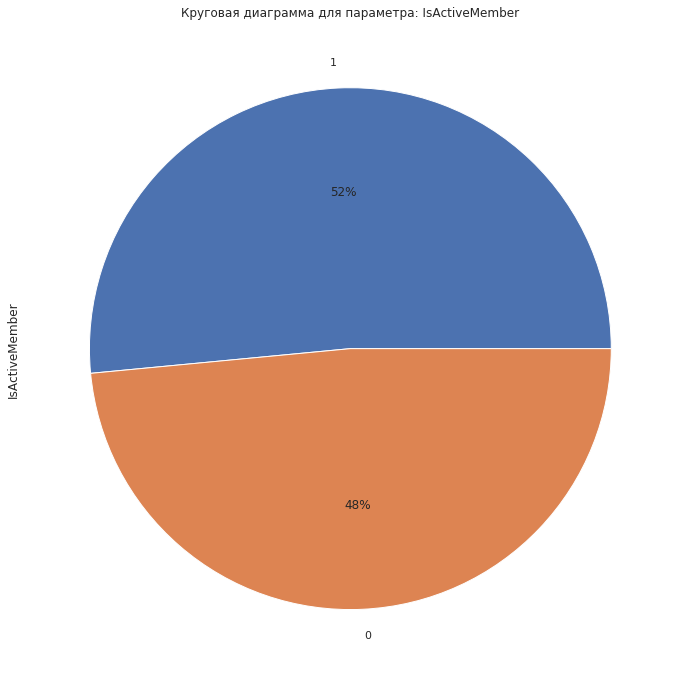

In [104]:
pie_chart_builder('IsActiveMember')

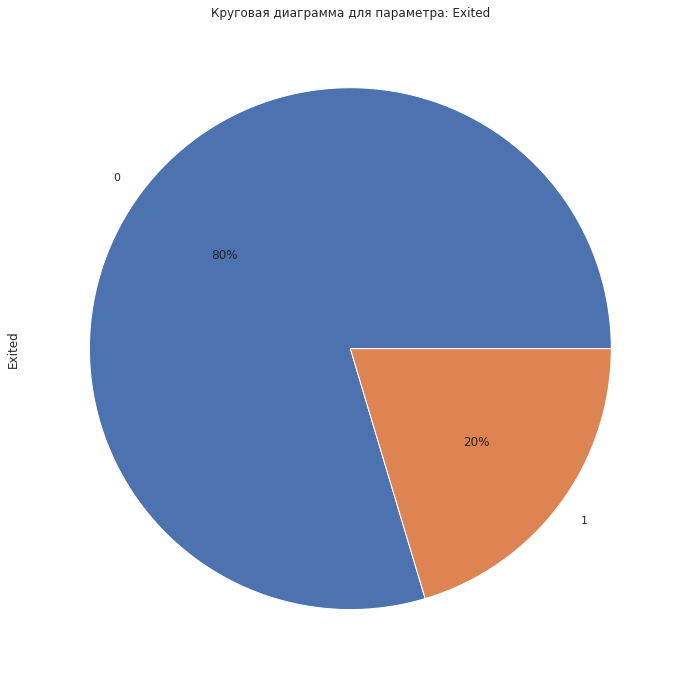

In [105]:
pie_chart_builder('Exited')

Целевой признак имеет дисбаланс: 80% класса '0', 20% класса '1'

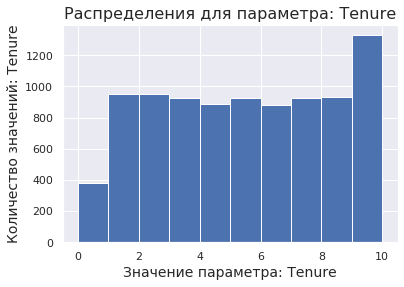

In [106]:
#добавленный код v2.0
#проверяем распределение параметра Tenure ДО заполнения пропусков
plt.title("Распределения для параметра: Tenure", fontsize=16)
plt.ylabel("Количество значений: Tenure", fontsize=14)
plt.xlabel("Значение параметра: Tenure", fontsize=14)
df['Tenure'].hist(bins=10);

Видно, что объем данных со значением '0' меньше остальных более чем в 2 раза. Принимаем гипотезу, что NaN значения - клиенты со "стажем" менее года, для которых не смогли внести данные.

Подготовим данные

In [107]:
#убираем пропуски в Tenure
df['Tenure'].isna().sum()

909

In [108]:
df['Tenure'] = df['Tenure'].fillna(0)
df['Tenure'].isna().sum()

0

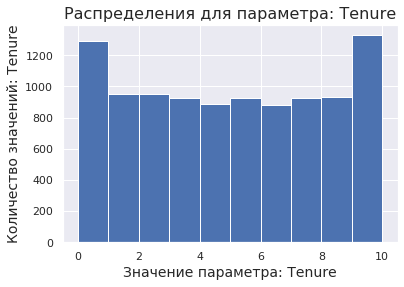

In [109]:
#добавленный код v2.0
#проверяем распределение параметра Tenure ДО заполнения пропусков
plt.title("Распределения для параметра: Tenure", fontsize=16)
plt.ylabel("Количество значений: Tenure", fontsize=14)
plt.xlabel("Значение параметра: Tenure", fontsize=14)
df['Tenure'].hist(bins=10);

In [110]:
#удаляем лишние столбцы
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Для категориальных признаков используем прямое кодирования с drop_first = True, чтобы обучать модель категориальному признаку и избежать dummy-ловушки:

In [111]:
df = pd.get_dummies(df, drop_first=True)

Чтобы избежать проблем при обучении, связанных с масштабом численных признаков, используем StandardScaler, для их масштабирования (приведение к среднему равному нулю и стандартному отклонению равному 1):

Вывод по пункту 1:

- Датасет содержит 10000 наблюдений. Дубликатов нет, пропуски только по признаку Tenure. Заменили пропуски на 0. Значимых выбросов не обнаружено.
- Применили прямое кодирование для категориальных признаков
- Применим стандартизацию числовых признаков с помощью StandardScaler
- Удалили лишние признаки 'RowNumber', 'CustomerId', 'Surname'
- Целевой признак имеет дисбаланс 4:1 (нулевых и единичных ответов, соответственно)
- Датасет готов для разделения на выборки и дальнейшего исследования

## Исследование задачи

Разделим данные на признаки и "ответы", а далее на обучающую, валидационную и тестовую выборки в пропорции 60/20/20%

In [112]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

In [113]:
features_rest, features_test, target_rest, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_rest, target_rest, test_size=0.25, random_state=12345)

Проверяем размеры выборок:

In [114]:
print("Размер обучающей выборки, признаки и ответы: ", features_train.shape, "и ", target_train.shape)
print("Размер валидационной выборки, признаки и ответы: ", features_valid.shape, "и ", target_valid.shape)
print("Размер тестовой выборки, признаки и ответы: ", features_test.shape, "и ", target_test.shape)

Размер обучающей выборки, признаки и ответы:  (6000, 11) и  (6000,)
Размер валидационной выборки, признаки и ответы:  (2000, 11) и  (2000,)
Размер тестовой выборки, признаки и ответы:  (2000, 11) и  (2000,)


Применим три модели классификации: Логистическая регрессия, решающее дерево, случайный лес, - без борьбы с дисбалансом по целевому признаку (на данный момент 80 и 20% для отрицательных и положительных ответов, соответственно)

In [115]:
#добавленный код v2.0
#производим стандартизацию выборок
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [116]:
print(features_train.shape)
features_train.head(5)

(6000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.174142,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-1.451074,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.131841,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-0.812608,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.783558,0.813110,0.816929,1,1,0.801922,0,0,0


In [117]:
print(features_valid.shape)
features_valid.head(5)

(2000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2358,0.175393,0.399118,-1.131841,1.385698,-0.896909,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,-0.812608,-1.232442,-0.896909,1,0,0.254415,0,1,1
163,0.711757,-0.268942,-0.812608,-1.232442,0.816929,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,0.464325,0.672529,-0.896909,1,0,0.585847,1,0,0
5989,0.165078,1.353490,1.741257,0.536522,-0.896909,0,0,1.462457,0,0,0


In [118]:
print(features_test.shape)
features_test.head(5)

(2000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.123733,0.685430,-0.493375,-1.232442,-0.896909,1,1,0.980212,0,1,0
1402,1.083087,-0.937002,1.102791,0.858518,-0.896909,1,0,-0.390486,0,0,1
8606,1.598822,0.303681,0.145091,-1.232442,0.816929,1,1,-0.435169,0,1,1
8885,0.165078,0.589993,-0.174142,0.412100,0.816929,1,1,1.017079,0,1,1
6494,0.484834,-1.032439,0.783558,-1.232442,0.816929,1,1,-1.343558,0,0,1


### Логистическая регрессия

Гиперпараметры модели:
- C - инверсия силы регуляризации (малые значения -> модель недостаточно "штрафуется" за ошибки. Большие значения -> модель "боится ошибиться" и стремится к переобучению)
- max_iter - число итераций, прежде чем будет достигнут критерий останова. (так как наилучшая точность не отличается, если использовать гиперпараметр по умолчанию, не будем использовать этот гиперпараметр)
- solver - алгоритм оптимизации проблемы (для небольшого датасета используем liblinear)

In [119]:
#обучаем и оцениваем модель
def logit_regr(features_train, features_valid, target_train, target_valid, cw = None):
    best_model_f1 = []
    best_f1 = 0
    best_f1_acc = 0

    best_model_roc_auc = []
    best_roc_auc = 0
    best_roc_auc_acc = 0


    for C_cur in np.linspace(0.01,2,100):
        model = LogisticRegression(C=C_cur,
                                   solver='liblinear',
                                   class_weight = cw,
                                   random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if (f1>best_f1):
            best_f1 = f1
            best_f1_acc = accuracy_score(target_valid, predictions)
            best_params_f1 = [C_cur]
        roc_auc = roc_auc_score(target_valid, predictions)
        if (roc_auc>best_roc_auc):
            best_roc_auc = roc_auc
            best_roc_auc_acc = accuracy_score(target_valid, predictions)
            best_model_roc_auc = [C_cur]

    print('''Модель логистической регрессии
          1. Лучшая модель по метрике f1:
          f1: {}
          accuracy: {}
          C_cur: {}

          2. Лучшая модель по метрике roc_auc:
          roc_auc: {}
          accuracy: {}
          C_cur: {}
          '''.format(round(best_f1, 3),
                    round(best_f1_acc, 3),
                    round(best_params_f1[0], 3),
                    round(best_roc_auc, 3),
                    round(best_roc_auc_acc, 3),
                    round(best_model_roc_auc[0], 3)))



In [120]:
start = time.time()
    
logit_regr(features_train, features_valid, target_train, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель логистической регрессии
          1. Лучшая модель по метрике f1:
          f1: 0.306
          accuracy: 0.816
          C_cur: 0.171

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.586
          accuracy: 0.816
          C_cur: 0.171
          
Количество секунд обучения:  19.77


f1 = 0.31 < 0.59, модель не подходит 

Лучшая модель по метрике f1:
- f1: 0.306
- accuracy: 0.816
- C_cur: 0.171

### Решающее дерево

Гиперпараметры модели:
- max_depth - максимальная глубина дерева
- min_samples_split - минимальное количество примеров для разделения
- min_samples_leaf - минимальное количество объектов в листе
- criterion - функция качества деления (Gini impurity / Entropy) - используем Gini   

In [121]:
#обучаем и оцениваем модель
def decision_tree(features_train, features_valid, target_train, target_valid, cw = None):
    best_model_f1 = []
    best_f1 = 0
    best_f1_acc = 0

    best_model_roc_auc = []
    best_roc_auc = 0
    best_roc_auc_acc = 0

    for depth in range(2,15):
        for samples_split in range(2,10):
            for samples_leaf in range(1,10):
                model = DecisionTreeClassifier(max_depth=depth,
                                               min_samples_split=samples_split,
                                               min_samples_leaf=samples_leaf,
                                               criterion='gini',
                                               class_weight = cw,
                                               random_state=12345)
                model.fit(features_train, target_train)
                predictions = model.predict(features_valid)
                f1 = f1_score(target_valid, predictions)
                if (f1>best_f1):
                    best_f1 = f1
                    best_f1_acc = accuracy_score(target_valid, predictions)
                    best_params_f1 = [depth, samples_split, samples_leaf]
                roc_auc = roc_auc_score(target_valid, predictions)
                if (roc_auc>best_roc_auc):
                    best_roc_auc = roc_auc
                    best_roc_auc_acc = accuracy_score(target_valid, predictions)
                    best_model_roc_auc = [depth, samples_split, samples_leaf]

    print('''Модель решающего дерева
      1. Лучшая модель по метрике f1:
      f1: {}
      accuracy: {}
      max_depth: {}
      min_samples_split: {}
      min_samples_leaf: {}

      2. Лучшая модель по метрике roc_auc:
      roc_auc: {}
      accuracy: {}
      max_depth: {}
      min_samples_split: {}
      min_samples_leaf: {}
      '''.format(round(best_f1, 3),
                round(best_f1_acc, 3),
                best_params_f1[0],
                best_params_f1[1],
                best_params_f1[2],
                round(best_roc_auc, 3),
                round(best_roc_auc_acc, 3),
                best_model_roc_auc[0],
                best_model_roc_auc[1],
                best_model_roc_auc[2]))


In [122]:
start = time.time()

decision_tree(features_train, features_valid, target_train, target_valid, cw = None)

end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель решающего дерева
      1. Лучшая модель по метрике f1:
      f1: 0.567
      accuracy: 0.862
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 8

      2. Лучшая модель по метрике roc_auc:
      roc_auc: 0.714
      accuracy: 0.849
      max_depth: 10
      min_samples_split: 2
      min_samples_leaf: 8
      
Количество секунд обучения:  29.18


f1 = 0.57 < 0.59, модель не подходит 

Лучшая модель по метрике f1:
- f1: 0.567
- accuracy: 0.862
- max_depth: 7
- min_samples_split: 2
- min_samples_leaf: 8

### Случайный лес

In [123]:
#обучаем и оцениваем модель
def random_forest(features_train, features_valid, target_train, target_valid, cw = None):
    best_model_f1 = []
    best_f1 = 0
    best_f1_acc = 0

    best_model_roc_auc = []
    best_roc_auc = 0
    best_roc_auc_acc = 0


    for depth in range(2,12):
        for est in range(1,7):
            for samples_split in range(2,10):
                for samples_leaf in range(1,10):
                    model = RandomForestClassifier(n_estimators=est,
                                                   max_depth=depth,
                                                   min_samples_split=samples_split,
                                                   min_samples_leaf=samples_leaf,
                                                   criterion='gini',
                                                   class_weight = cw,
                                                   random_state=12345)
                    model.fit(features_train, target_train)
                    predictions = model.predict(features_valid)
                    f1 = f1_score(target_valid, predictions)
                    if (f1>best_f1):
                        best_f1 = f1
                        best_f1_acc = accuracy_score(target_valid, predictions)
                        best_params_f1 = [est, depth, samples_split, samples_leaf]
                    roc_auc = roc_auc_score(target_valid, predictions)
                    if (roc_auc>best_roc_auc):
                        best_roc_auc = roc_auc
                        best_roc_auc_acc = accuracy_score(target_valid, predictions)
                        best_model_roc_auc = [est, depth, samples_split, samples_leaf]

    print('''Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: {}
          accuracy: {}
          n_estimators: {}
          max_depth: {}
          min_samples_split: {}
          min_samples_leaf: {}

          2. Лучшая модель по метрике roc_auc:
          roc_auc: {}
          accuracy: {}
          n_estimators: {}
          max_depth: {}
          min_samples_split: {}
          min_samples_leaf: {}
          '''.format(round(best_f1, 3),
                    round(best_f1_acc, 3),
                    best_params_f1[0],
                    best_params_f1[1],
                    best_params_f1[2],
                    best_params_f1[3],
                    round(best_roc_auc, 3),
                    round(best_roc_auc_acc, 3),
                    best_model_roc_auc[0],
                    best_model_roc_auc[1],
                    best_model_roc_auc[2],
                    best_model_roc_auc[3]))


In [124]:
start = time.time()

random_forest(features_train, features_valid, target_train, target_valid, cw=None)

end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.571
          accuracy: 0.867
          n_estimators: 6
          max_depth: 10
          min_samples_split: 9
          min_samples_leaf: 2

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.712
          accuracy: 0.841
          n_estimators: 1
          max_depth: 10
          min_samples_split: 2
          min_samples_leaf: 7
          
Количество секунд обучения:  148.2


f1 = 0.57 < 0.59, модель не подходит 

Лучшая модель по метрике f1:
- f1: 0.57
- accuracy: 0.867
- n_estimators: 6
- max_depth: 10
- min_samples_split: 9
- min_samples_leaf: 2

Проверка на адекватность:

Проверка на адекватность также необходима чтобы понять, что модель "адекватно" пытается выявить закономерность в данных, а не просто выдавать ответ определенного образца, потому что его больше по объему в датасете. Если точность модели равна объему целевого признака определенной категории, то это дает повод задуматься.

In [125]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [126]:
#используем DummyClassifier для проверки адекватности модели
best_accuracy = 0

model = DummyClassifier(strategy='most_frequent')
model.fit(features_train, target_train)
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print("Точность модели на тестовой выборке составляет: ", round(accuracy, 3))

Точность модели на тестовой выборке составляет:  0.786


👍👍👍

Вывод по пункту 2:

- Ни одна из рассмотренных моделей не подходит для проекта (f1 < 0.59). Попробуем разобраться с дисбалансом и посмотреть на результат.
- Лучший результат у модели Случайный лес (f1 = 0.57), худший - у модели Логистическая регрессия (f1 = 0.306). По метрике roc_auc лучшие результаты для Моделей случайный лес и решающего дерева (0.712), а худший - для логистической регрессии (0.586).
- Метрика accuracy для всех полученных моделей >80% (что не является показательной метрикой, точность для DummyClassifier составляет 78.6%), а метрика f1 < 0.59. Это подчеркивает важность работы с метрикой f1 при работе с дисбалансом в целевом признаке

## Борьба с дисбалансом

Попробуем следующие варианты борьбы с дисбалансом:
- Взвешивание объектов
- Upsampling
- Downsampling
- Выбор порога

### Взвешивание объектов

In [127]:
#logistic_regression
start = time.time()
    
logit_regr(features_train, features_valid, target_train, target_valid, cw = 'balanced')
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель логистической регрессии
          1. Лучшая модель по метрике f1:
          f1: 0.478
          accuracy: 0.708
          C_cur: 0.111

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.699
          accuracy: 0.708
          C_cur: 0.111
          
Количество секунд обучения:  19.87


In [128]:
#decision_tree
start = time.time()
    
decision_tree(features_train, features_valid, target_train, target_valid, cw = 'balanced')
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель решающего дерева
      1. Лучшая модель по метрике f1:
      f1: 0.562
      accuracy: 0.782
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 3

      2. Лучшая модель по метрике roc_auc:
      roc_auc: 0.758
      accuracy: 0.764
      max_depth: 5
      min_samples_split: 2
      min_samples_leaf: 8
      
Количество секунд обучения:  30.48


In [129]:
#random_forest
start = time.time()
    
random_forest(features_train, features_valid, target_train, target_valid, cw = 'balanced')
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.591
          accuracy: 0.832
          n_estimators: 5
          max_depth: 11
          min_samples_split: 8
          min_samples_leaf: 1

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.759
          accuracy: 0.804
          n_estimators: 6
          max_depth: 6
          min_samples_split: 2
          min_samples_leaf: 3
          
Количество секунд обучения:  153.6


На данном этапе f1 = 0.592 > 0.59. Однако, используем последующие способы борьбы с дисбалансом.

### Upsampling

In [130]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [131]:
#logistic_regression
start = time.time()

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
logit_regr(features_upsampled, features_valid, target_upsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель логистической регрессии
          1. Лучшая модель по метрике f1:
          f1: 0.486
          accuracy: 0.808
          C_cur: 0.07

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.678
          accuracy: 0.808
          C_cur: 0.07
          
Количество секунд обучения:  19.79


In [132]:
#decision_tree
start = time.time()
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
decision_tree(features_upsampled, features_valid, target_upsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель решающего дерева
      1. Лучшая модель по метрике f1:
      f1: 0.584
      accuracy: 0.84
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 5

      2. Лучшая модель по метрике roc_auc:
      roc_auc: 0.74
      accuracy: 0.84
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 5
      
Количество секунд обучения:  32.88


In [133]:
#random_forest
start = time.time()

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
random_forest(features_upsampled, features_valid, target_upsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.614
          accuracy: 0.858
          n_estimators: 5
          max_depth: 8
          min_samples_split: 8
          min_samples_leaf: 2

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.752
          accuracy: 0.854
          n_estimators: 3
          max_depth: 8
          min_samples_split: 8
          min_samples_leaf: 2
          
Количество секунд обучения:  161.51


### Downsampling

In [134]:
def downsample(features, target, fraction):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [135]:
#logistic_regression
start = time.time()

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)
logit_regr(features_downsampled, features_valid, target_downsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель логистической регрессии
          1. Лучшая модель по метрике f1:
          f1: 0.493
          accuracy: 0.806
          C_cur: 0.915

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.684
          accuracy: 0.806
          C_cur: 0.915
          
Количество секунд обучения:  17.69


In [136]:
#decision_tree
start = time.time()

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)
decision_tree(features_downsampled, features_valid, target_downsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель решающего дерева
      1. Лучшая модель по метрике f1:
      f1: 0.593
      accuracy: 0.828
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 7

      2. Лучшая модель по метрике roc_auc:
      roc_auc: 0.757
      accuracy: 0.828
      max_depth: 7
      min_samples_split: 2
      min_samples_leaf: 7
      
Количество секунд обучения:  20.11


In [137]:
#random_forest
start = time.time()

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.6)
random_forest(features_downsampled, features_valid, target_downsampled, target_valid, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.605
          accuracy: 0.859
          n_estimators: 6
          max_depth: 8
          min_samples_split: 2
          min_samples_leaf: 5

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.743
          accuracy: 0.859
          n_estimators: 6
          max_depth: 8
          min_samples_split: 2
          min_samples_leaf: 5
          
Количество секунд обучения:  119.3


### Выбор порога

Так как модель случайного леса показывает наилучший результат среди трех рассматриваемых моделей, в этом пункте будем рассматривать ее:

In [138]:
#обучаем и оцениваем модель
def random_forest_threshold(features_train, features_valid, target_train, target_valid, cw = None):
    best_model_f1 = []
    best_f1 = 0
    best_f1_acc = 0

    best_model_roc_auc = []
    best_roc_auc = 0
    best_roc_auc_acc = 0


    for depth in range(2,12):
        for est in range(1,7):
            for samples_split in range(2,10):
                for samples_leaf in range(1,10):
                    model = RandomForestClassifier(n_estimators=est,
                                                   max_depth=depth,
                                                   min_samples_split=samples_split,
                                                   min_samples_leaf=samples_leaf,
                                                   criterion='gini',
                                                   class_weight = cw,
                                                   random_state=12345)
                    model.fit(features_train, target_train)
                    predictions = model.predict_proba(features_valid)
                    predictions_one_valid = predictions[:, 1]
                    
                    for threshold in np.arange(0, 1, 0.1):
                        predicted_final = predictions_one_valid > threshold
                        f1 = f1_score(target_valid, predicted_final)
                        if (f1>best_f1):
                            best_f1 = f1
                            best_f1_acc = accuracy_score(target_valid, predicted_final)
                            best_params_f1 = [threshold, est, depth, samples_split, samples_leaf]
                        roc_auc = roc_auc_score(target_valid, predicted_final)
                        if (roc_auc>best_roc_auc):
                            best_roc_auc = roc_auc
                            best_roc_auc_acc = accuracy_score(target_valid, predicted_final)
                            best_model_roc_auc = [threshold, est, depth, samples_split, samples_leaf]

    print('''Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: {}
          accuracy: {}
          threshold: {}
          n_estimators: {}
          max_depth: {}
          min_samples_split: {}
          min_samples_leaf: {}

          2. Лучшая модель по метрике roc_auc:
          roc_auc: {}
          accuracy: {}
          threshold: {}
          n_estimators: {}
          max_depth: {}
          min_samples_split: {}
          min_samples_leaf: {}
          '''.format(round(best_f1, 3),
                    round(best_f1_acc, 3),
                    round(best_params_f1[0], 1),
                    best_params_f1[1],
                    best_params_f1[2],
                    best_params_f1[3],
                    best_params_f1[4],
                    round(best_roc_auc, 3),
                    round(best_roc_auc_acc, 3),
                    round(best_model_roc_auc[0], 1),
                    best_model_roc_auc[1],
                    best_model_roc_auc[2],
                    best_model_roc_auc[3],
                    best_model_roc_auc[4]))


In [139]:
#random_forest+threshold
start = time.time()

random_forest_threshold(features_train, features_valid, target_train, target_valid, cw=None)

end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.606
          accuracy: 0.842
          threshold: 0.3
          n_estimators: 6
          max_depth: 7
          min_samples_split: 2
          min_samples_leaf: 9

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.763
          accuracy: 0.762
          threshold: 0.2
          n_estimators: 5
          max_depth: 7
          min_samples_split: 2
          min_samples_leaf: 9
          
Количество секунд обучения:  314.91


Проверим сочетание выбора порога и использования upsample данные:

In [140]:
#random_forest+threshold+upsample
start = time.time()

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
random_forest_threshold(features_upsampled, features_valid, target_upsampled, target_valid, cw = None)

end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

Модель случайного леса
          1. Лучшая модель по метрике f1:
          f1: 0.614
          accuracy: 0.858
          threshold: 0.5
          n_estimators: 5
          max_depth: 8
          min_samples_split: 8
          min_samples_leaf: 2

          2. Лучшая модель по метрике roc_auc:
          roc_auc: 0.768
          accuracy: 0.769
          threshold: 0.3
          n_estimators: 5
          max_depth: 9
          min_samples_split: 9
          min_samples_leaf: 3
          
Количество секунд обучения:  330.82


Оптимальный порог для модели с upsample данными по метрике f1 равен 0.5, который был по умолчанию.

Выводы по пункту 3:

- Четыре метода взвешивание объектов, upsample, downsample и выбор порога показали хорошие результаты по увеличению метрики f1. Для модели случайного леса f1 > 0.59 после применения методов борьбы с дисбалансом.
- Лучший результат достигнут в upsampling, f1 = 0.614
- Сочетание методов upsampling и выбора порога не дало увеличения в метрике f1 (f1 = 0.614)
    

## Тестирование модели

Итоговая модель для тестирования:

In [146]:
print('''Модель случайного леса + upsample данных

f1: 0.614
accuracy: 0.858
n_estimators: 5
max_depth: 8
min_samples_split: 8
min_samples_leaf: 2''')

Модель случайного леса + upsample данных

f1: 0.614
accuracy: 0.858
n_estimators: 5
max_depth: 8
min_samples_split: 8
min_samples_leaf: 2


In [142]:
#функция построения ROC-кривой
def plot_roc_curve(fpr, tpr, label):
    sns.set()
    plt.figure(figsize=(12,12))
    plt.title(label, fontsize=20)
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,1], [0,1], linestyle='--')
    plt.plot(fpr,tpr)
    plt.show()

In [143]:
#обучаем и оцениваем модель
def random_forest_final(features_train, features_test, target_train, target_test, cw = None):
    best_model_f1 = []
    best_model_f1_metrics = []
    
    best_f1 = 0
    
    model = RandomForestClassifier(n_estimators=5,
                                   max_depth=8,
                                   min_samples_split=8,
                                   min_samples_leaf=2,
                                   criterion='gini',
                                   class_weight = cw,
                                   random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    predictions_proba = model.predict_proba(features_test)
    predictions_proba_one = predictions_proba[:, 1]
    f1 = f1_score(target_test, predictions)
    if (f1>best_f1):
        best_params_f1 = [5, 8, 8, 2]
        
        best_f1 = f1
        best_f1_acc = accuracy_score(target_test, predictions)
        best_f1_recall = recall_score(target_test, predictions)
        best_f1_precision = precision_score(target_test, predictions)
        best_f1_roc_auc = roc_auc_score(target_test, predictions)
        
        best_model_f1_metrics = [best_f1, best_f1_acc, best_f1_recall, best_f1_precision, best_f1_roc_auc]
        
        fpr, tpr, thresholds = roc_curve(target_test, predictions_proba_one)
     
    plot_roc_curve(fpr, tpr, 'ROC-curve, RF model')
  
    print('''Модель случайного леса
  Метрики итоговой модели:
  f1: {}
  accuracy: {}
  recall: {}
  precision: {}
  roc_auc: {}

  Гиперпараметры итоговой модели:
  n_estimators: {}
  max_depth: {}
  min_samples_split: {}
  min_samples_leaf: {}
  '''.format(
            round(best_model_f1_metrics[0], 3),
            round(best_model_f1_metrics[1], 3),
            round(best_model_f1_metrics[2], 3),
            round(best_model_f1_metrics[3], 3),
            round(best_model_f1_metrics[4], 3),
            best_params_f1[0],
            best_params_f1[1],
            best_params_f1[2],
            best_params_f1[3]
            )
         )


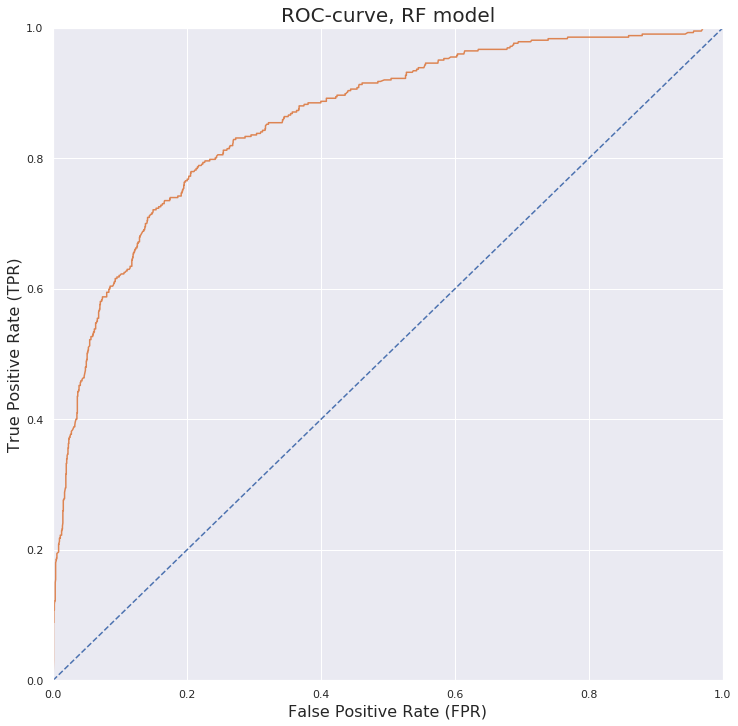

Модель случайного леса
  Метрики итоговой модели:
  f1: 0.631
  accuracy: 0.855
  recall: 0.581
  precision: 0.691
  roc_auc: 0.755

  Гиперпараметры итоговой модели:
  n_estimators: 5
  max_depth: 8
  min_samples_split: 8
  min_samples_leaf: 2
  
Количество секунд обучения:  0.7


In [144]:
#random_forest_final
start = time.time()

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
random_forest_final(features_upsampled, features_test, target_upsampled, target_test, cw = None)
    
end = time.time()
print("Количество секунд обучения: ", round(end - start, 2))

**Вывод по пункту 4:**

Метрики итоговой модели на тестовой выборке:
- **f1: 0.631**
- accuracy: 0.856
- recall: 0.581
- precision: 0.693
- roc_auc: 0.755

Гиперпараметры итоговой модели случайного леса:

- n_estimators: 5
- max_depth: 8
- min_samples_split: 8
- min_samples_leaf: 2

## Общий вывод

- Датасет содержит 10000 наблюдений. Дубликатов нет, пропуски только по признаку Tenure. Заменили пропуски на 0. Значимых выбросов не обнаружено.
- Применили прямое кодирование для категориальных признаков
- Применили стандартизацию числовых признаков с помощью StandardScaler
- Удалили лишние признаки 'RowNumber', 'CustomerId', 'Surname'
- Изначально, целевой признак имеет дисбаланс 4:1 (нулевых и единичных ответов, соответственно)

- Ни одна из рассмотренных моделей до борьбы с дисбалансом не подходила для проекта (f1 < 0.59)
- Метрика accuracy для всех полученных моделей >80% до борьбы с дисбалансом (что не является показательной метрикой, точность для DummyClassifier составляет 78.6%), а метрика f1 < 0.59. Это подчеркивает важность работы с метрикой f1 при работе с дисбалансом в целевом признаке
- LogisticRegression показывает наихудшие результаты, RandomForest - наилучшие. Для тестовой модели примем RandomForest

- Четыре метода борьбы с дисбалансом взвешивание объектов, upsample, downsample и выбор порога показали хорошие результаты по увеличению метрики f1. Для модели случайного леса f1 > 0.59 после применения методов борьбы с дисбалансом.
- Лучший результат достигнут в upsampling, f1 = 0.614

Метрики итоговой модели случайного леса на тестовой выборке:
- **f1: 0.631**
- accuracy: 0.856
- recall: 0.581
- precision: 0.693
- roc_auc: 0.755

Гиперпараметры итоговой модели случайного леса:

- n_estimators: 5
- max_depth: 8
- min_samples_split: 8
- min_samples_leaf: 2

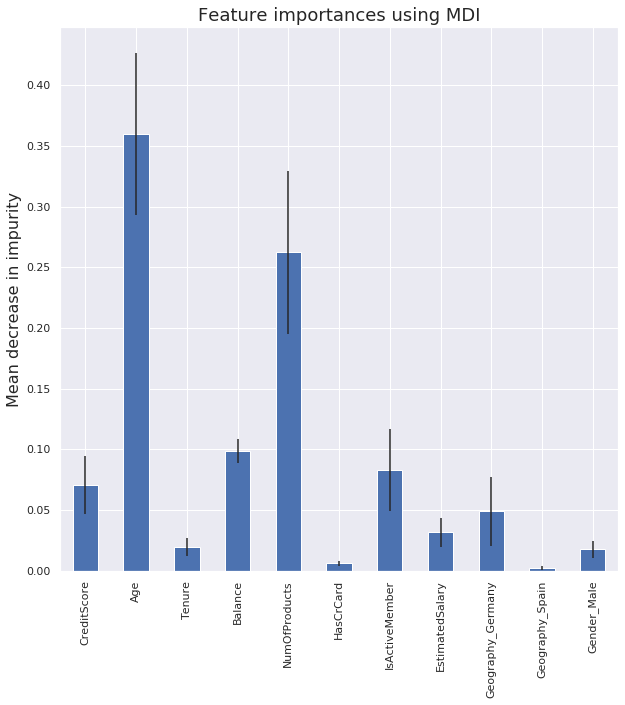

In [159]:
#добавленный код v2.0
#проанализируем важность параметров модели и построим график

model = RandomForestClassifier(n_estimators=5,
                               max_depth=8,
                               min_samples_split=8,
                               min_samples_leaf=2,
                               criterion='gini',
                               class_weight = None,
                               random_state=12345)
model.fit(features_train, target_train)
#importances:
importances = model.feature_importances_
feature_names = features_train.columns.to_list()
#standart deviation:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
#forest importances как вектор данных:
forest_importances = pd.Series(importances, index=feature_names)
#строим график:
#fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
forest_importances.plot.bar(yerr=std)
plt.title("Feature importances using MDI", fontsize=18)
plt.ylabel("Mean decrease in impurity", fontsize=16)
plt.show()




Как видно, основными признаками модели являются: 

в первую очередь: 

- возраст
- кол-во используемых продуктов

во-вторых: 

- кредитный рейтинг 
- баланс 
- статус активного пользователя